# Forecast Green Energy


Can you forecast green energy in the future?



# Problem Statement


Welcome to Green - A country well known for its greenery and natural resources. Green is working towards the betterment of the environment, natural resources, and health of citizens. Over the past few years, Green has improvised its natural resources by enabling the technologies for a safer future. 


The major investment happened to be in renewable energy. As of today, renewable energy contributes to 60% of the total energy capacity in the country. By 2030, the target is to generate 95% of the total energy through renewable energy.


In order to achieve this objective, the government of Green Energy would like to use Data Science to understand the total energy demand of the country in the near future. This will help the government to build the infrastructure and technologies to achieve 95% of the total energy capacity via renewable energy.


They have captured the estimated total energy demand from the past 12 years on an hourly basis. Now, the government of Green Energy is looking for a data scientist to understand the data and forecast the total energy demand for the next 3 years based on past trends.


Help Green! Save Nature! Stay Healthy!

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import essential libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns

# Train Dataset

In [4]:
# import train dataset
train = pd.read_csv('train_IxoE5JN.csv')
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [5]:
print('Shape of the train dataset :',train.shape)

Shape of the train dataset : (94992, 3)


In [6]:
# Check types of the dataset
train.dtypes

row_id        int64
datetime     object
energy      float64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,94992.0,47496.500000,27421.972723,1.0000,23748.7500,47496.5000,71244.25000,94992.0000
energy,93092.0,1702.995014,369.322103,866.3886,1431.5411,1654.4658,1935.99345,3374.3996


In [9]:
# Find out the missing value
train.isna().sum().any()

True

In [10]:
train.isna().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [11]:
train.isna().sum()/train.shape[0]*100,3

(row_id      0.000000
 datetime    0.000000
 energy      2.000168
 dtype: float64,
 3)

- There is data missing found in energy(2%) column of dataset. Hence we need drop this missinng dataset.

In [12]:
# Drop the missing value
train = train.dropna()

In [13]:
train.shape

(93092, 3)

In [14]:
# AFter droping find out is missing value available or not?
train.isna().sum().any()

False

In [15]:
# Datetime variable found in object datatype hence convert in datetime format.
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93092 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    93092 non-null  int64         
 1   datetime  93092 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.8 MB


In [17]:
# Drop the row_id column because those column in not useful for forecasting the green energy
train_data = train.drop('row_id',axis=1)
train_data.head()

,datetime,energy
0,2008-03-01 00:00:00,1259.985563
1,2008-03-01 01:00:00,1095.541500
2,2008-03-01 02:00:00,1056.247500
3,2008-03-01 03:00:00,1034.742000
4,2008-03-01 04:00:00,1026.334500


<AxesSubplot:ylabel='Density'>

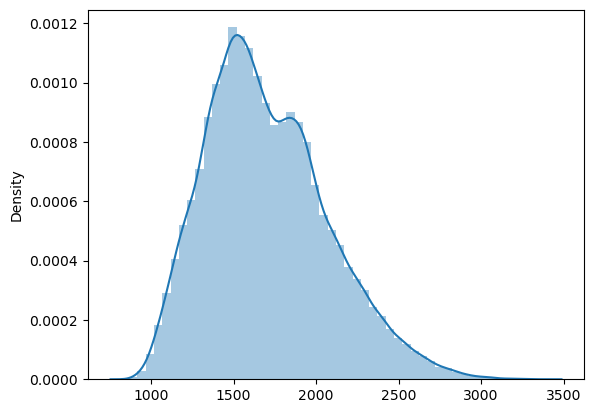

In [18]:
# Total Generation
sns.distplot(x= train['energy'], kde = True)

# Test Dataset

In [19]:
# Import the test dataset
test = pd.read_csv('test_WudNWDM.csv')
test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [20]:
print('Shape of the test dataset :',test.shape)

Shape of the test dataset : (26304, 2)


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26304 non-null  int64 
 1   datetime  26304 non-null  object
dtypes: int64(1), object(1)
memory usage: 411.1+ KB


In [22]:
# In test dataset Datetime variable found in object datatype hence convert in datetime format.
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26304 non-null  int64         
 1   datetime  26304 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 411.1 KB


In [24]:
train_data.set_index('datetime',inplace=True)

# Decomposition

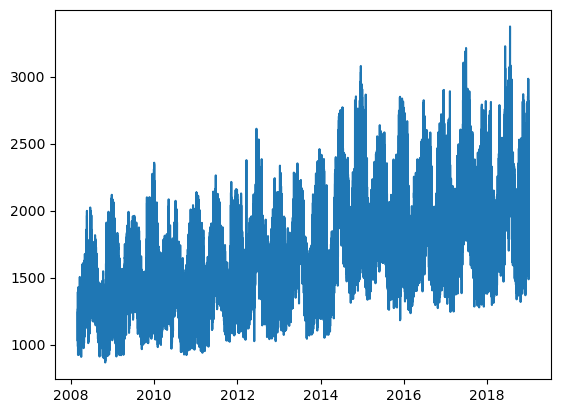

In [25]:
plt.plot(train_data)

In [26]:
ts_data = train_data['energy']
ts_data.head()

datetime
2008-03-01 00:00:00    1259.985563
2008-03-01 01:00:00    1095.541500
2008-03-01 02:00:00    1056.247500
2008-03-01 03:00:00    1034.742000
2008-03-01 04:00:00    1026.334500
Name: energy, dtype: float64

# Log Transformation

In [27]:
ts_data_log = np.log(ts_data)
ts_data_log.head()

datetime
2008-03-01 00:00:00    7.138856
2008-03-01 01:00:00    6.999004
2008-03-01 02:00:00    6.962478
2008-03-01 03:00:00    6.941907
2008-03-01 04:00:00    6.933749
Name: energy, dtype: float64

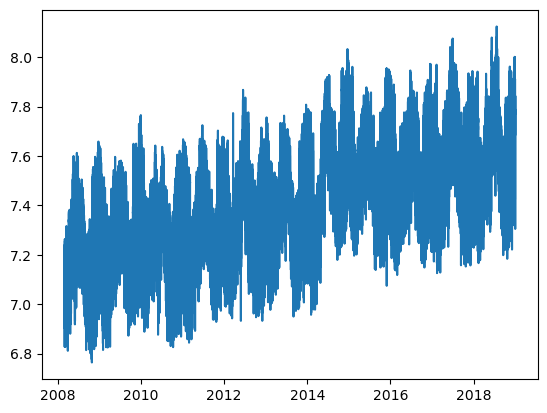

In [28]:
plt.plot(ts_data_log)

# Dickey-Fuller Test

In [29]:
def test_stationarity(timeseries):
    # Calculate the rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    original = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='green',label='Rolling Standard Deviation')
    plt.legend(loc='best')
    
    print('Result of Dickey-Fuller Test :\n')
    data_test = adfuller(timeseries)
    my_output = pd.Series(data_test[:4],index=['Test Statistic','p-value','#Lags Used','Number of Observation used'])
    for i, j in data_test[4].items():
        my_output['Critical Value(%s)'%i]=j
    print(my_output)

Result of Dickey-Fuller Test :

Test Statistic               -9.527076e+00
p-value                       2.958121e-16
#Lags Used                    6.700000e+01
Number of Observation used    9.302400e+04
Critical Value(1%)           -3.430420e+00
Critical Value(5%)           -2.861571e+00
Critical Value(10%)          -2.566787e+00
dtype: float64


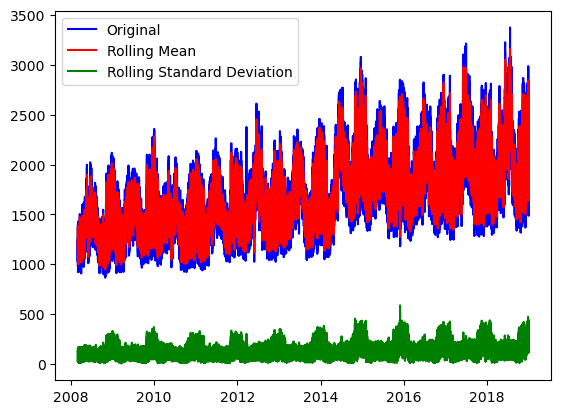

In [30]:
test_stationarity(train_data['energy'])

# Moving Average

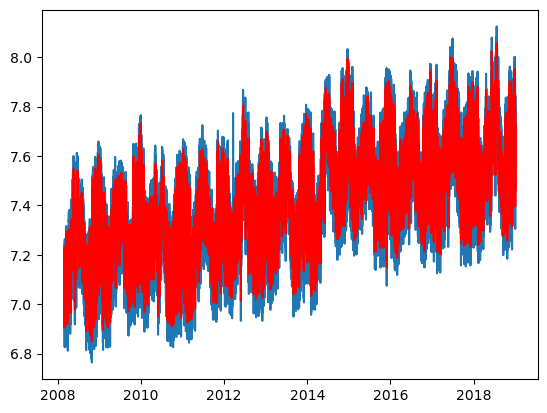

In [31]:
movingAverage = ts_data_log.rolling(window=12).mean()
movingSTD = ts_data_log.rolling(window=12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

# Differencing

In [32]:
ts_data_log_diff = ts_data_log - movingAverage
ts_data_log_diff.head(15)

datetime
2008-03-01 00:00:00         NaN
2008-03-01 01:00:00         NaN
2008-03-01 02:00:00         NaN
2008-03-01 03:00:00         NaN
2008-03-01 04:00:00         NaN
2008-03-01 05:00:00         NaN
2008-03-01 06:00:00         NaN
2008-03-01 07:00:00         NaN
2008-03-01 08:00:00         NaN
2008-03-01 09:00:00         NaN
2008-03-01 10:00:00         NaN
2008-03-01 11:00:00    0.143431
2008-03-01 12:00:00    0.145712
2008-03-01 13:00:00    0.129377
2008-03-01 14:00:00    0.122931
Name: energy, dtype: float64

In [33]:
ts_data_log_diff.dropna(inplace=True)
ts_data_log_diff.head()

datetime
2008-03-01 11:00:00    0.143431
2008-03-01 12:00:00    0.145712
2008-03-01 13:00:00    0.129377
2008-03-01 14:00:00    0.122931
2008-03-01 15:00:00    0.103512
Name: energy, dtype: float64

Result of Dickey-Fuller Test :

Test Statistic                  -44.730998
p-value                           0.000000
#Lags Used                       67.000000
Number of Observation used    93013.000000
Critical Value(1%)               -3.430420
Critical Value(5%)               -2.861571
Critical Value(10%)              -2.566787
dtype: float64


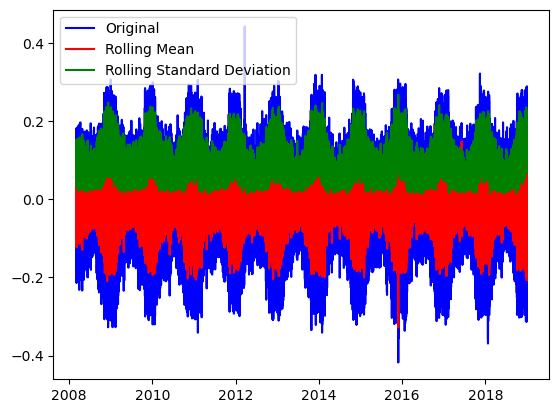

In [34]:
test_stationarity(ts_data_log_diff)

# ACF and PACF Graph

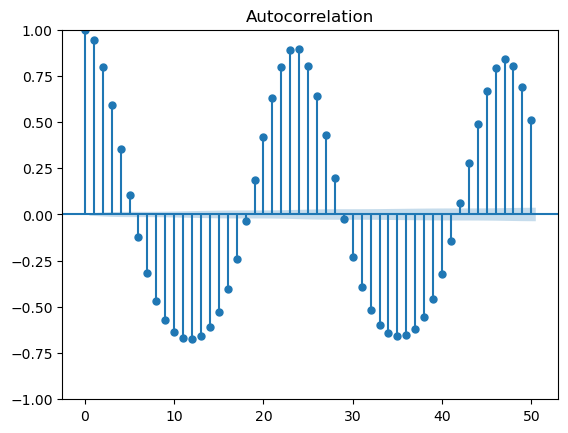

In [35]:
# PLotting the ACF Curve 
plot_acf(ts_data_log_diff)
plt.show()

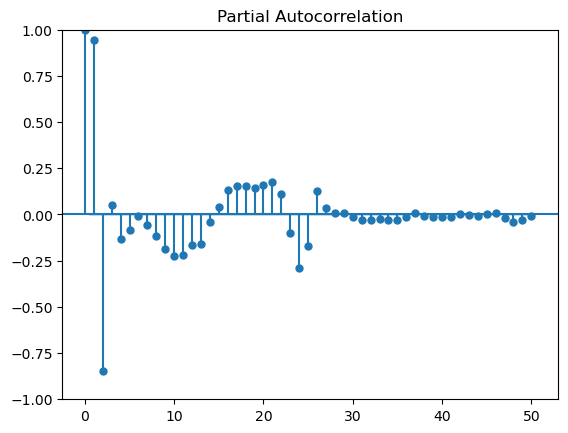

In [36]:
# PLotting the PACF Curve 
plot_pacf(ts_data_log_diff)
plt.show()

# Build ARIMA Model
Auto Regressive Integrated Moving Average is a class of models that explains a given time series based on its own past values, that is own lags and the lagged forecast errors, so that equation can be used to forecast future values.

In [37]:
my_model = sm.tsa.arima.ARIMA(ts_data_log,order=(2,1,5))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
results = my_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


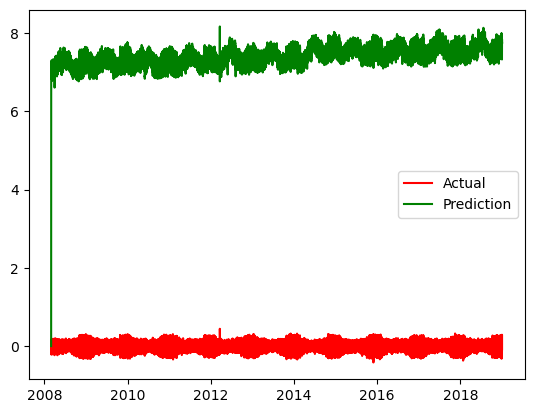

In [39]:
plt.plot(ts_data_log_diff,color='red',label='Actual')
plt.plot(results.fittedvalues,color='green',label='Prediction')
plt.legend(loc='best')

### Predicted values from ARIMA model in difference form

In [40]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

datetime
2008-03-01 00:00:00    0.000000
2008-03-01 01:00:00    7.138856
2008-03-01 02:00:00    6.892155
2008-03-01 03:00:00    6.969889
2008-03-01 04:00:00    6.943548
dtype: float64

### Performing inverse transformation for differencing by doing cumulative sum

In [41]:
# Add
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

datetime
2008-03-01 00:00:00     0.000000
2008-03-01 01:00:00     7.138856
2008-03-01 02:00:00    14.031011
2008-03-01 03:00:00    21.000900
2008-03-01 04:00:00    27.944448
dtype: float64

In [42]:
predictions_ARIMA_log = pd.Series(ts_data_log.iloc[0], index = ts_data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum)
predictions_ARIMA_log.head()

datetime
2008-03-01 00:00:00     7.138856
2008-03-01 01:00:00    14.277711
2008-03-01 02:00:00    21.169867
2008-03-01 03:00:00    28.139756
2008-03-01 04:00:00    35.083304
dtype: float64

# Calculate Performance of Model (RMSE)

In [43]:
#Calculate the RMSE
print('RMSE =',np.sqrt(sum(predictions_ARIMA_diff[1:] - ts_data[1:])**2)/len(ts_data))

RMSE = 1695.5644802880252


In [44]:
#forecast value, the standard error of the forecast, and the confidence interval information. 1960-12-15
results.forecast(steps = 7)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


93092    7.615950
93093    7.564537
93094    7.535034
93095    7.517170
93096    7.517076
93097    7.529994
93098    7.550805
Name: predicted_mean, dtype: float64

In [45]:
predictions = results.predict(start=test.shape[0],end=(test.shape[0]+test.shape[0]-1), dynamic=False)
predictions.shape

(26304,)

In [46]:
predictions = pd.DataFrame(predictions)
predictions = predictions.reset_index()
id_no = pd.DataFrame(test[test.columns[0]])
final_pred = id_no.join(predictions)
final_pred = final_pred.drop('datetime',axis=1)
final_pred = final_pred.rename(columns={'predicted_mean':'energy'})
final_pred['energy'] = round(np.exp(final_pred['energy']),3)
final_pred.to_csv('sample_submission.csv',index=False)
final_pred.head()

,row_id,energy
0,94993,1379.387
1,94994,1395.162
2,94995,1364.367
3,94996,1373.257
4,94997,1388.117
